In [ ]:
!pip install datasets -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 2.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 2.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 2.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 4.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 16.1.0 which is incompatible.
google-colab 1.0.0 requires requests==2.31.0, but you have requests 2.32.3 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 16.1.0 which is incompatible.


 Original Dataset: [lighteval-MATH](https://huggingface.co/datasets/lighteval/MATH)

In [ ]:
from datasets import load_dataset

data = load_dataset("lighteval/MATH")

The repository for lighteval/MATH contains custom code which must be executed to correctly load the dataset. You can inspect the repository content at https://hf.co/datasets/lighteval/MATH.
You can avoid this prompt in future by passing the argument `trust_remote_code=True`.

Do you wish to run the custom code? [y/N] y


Generating train split: 0 examples [00:00, ? examples/s]

Generating test split: 0 examples [00:00, ? examples/s]

In [ ]:
import pandas as pd

In [ ]:
train_data = data['train'].to_pandas()
test_data = data['test'].to_pandas()

dataset = pd.concat([train_data, test_data])    #concatenating the entire dataset of 12.5k samples

## Analysis

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

<Axes: xlabel='level', ylabel='count'>

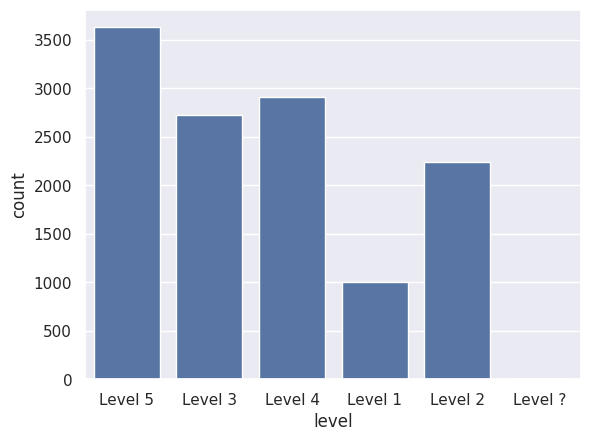

In [ ]:
sns.countplot(x = 'level', data = dataset)

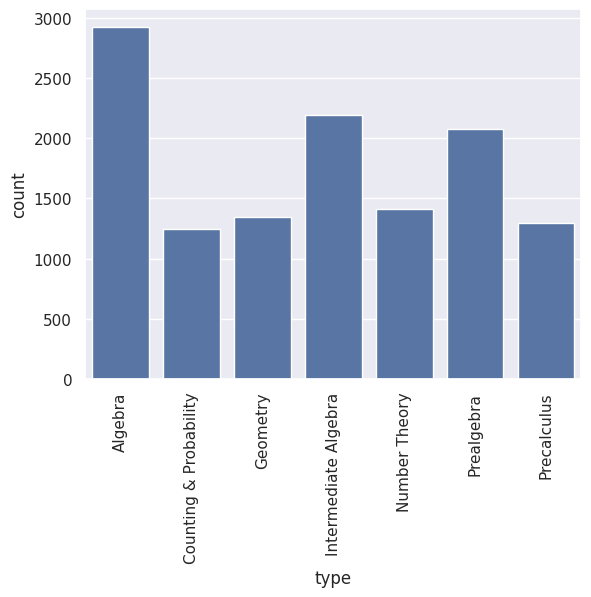

In [ ]:
sns.countplot(x= 'type', data = dataset)
plt.xticks(rotation = 90)
plt.show()

In [ ]:
dataset = dataset.reset_index()

In [ ]:
dataset

,index,problem,level,type,solution
0,0,"Let \[f(x) = \left\{\n\begin{array}{cl} ax+3, ...",Level 5,Algebra,"For the piecewise function to be continuous, t..."
1,1,A rectangular band formation is a formation wi...,Level 5,Algebra,Let $x$ be the number of band members in each ...
2,2,What is the degree of the polynomial $(4 +5x^3...,Level 3,Algebra,This polynomial is not written in standard for...
3,3,Evaluate $\left\lceil3\left(6-\frac12\right)\r...,Level 3,Algebra,"Firstly, $3\left(6-\frac12\right)=18-1-\frac12..."
4,4,Sam is hired for a 20-day period. On days that...,Level 3,Algebra,Call $x$ the number of days Sam works and $y$ ...
...,...,...,...,...,...
12495,4995,If $\sin x + \cos x = \frac{1}{5}$ and $0 < x ...,Level 5,Precalculus,"From the given equation, $\cos x = \frac{1}{5}..."
12496,4996,The matrix for projecting onto a certain plane...,Level 5,Precalculus,Since $\begin{pmatrix} a \\ b \\ c \end{pmatri...
12497,4997,"Let $\mathbf{a},$ $\mathbf{b},$ and $\mathbf{c...",Level 4,Precalculus,Since $\mathbf{a} + \mathbf{b} + \mathbf{c} = ...
12498,4998,Find the smallest positive integer solution to...,Level 5,Precalculus,"By the tangent addition formula,\n\begin{align..."


In [ ]:
data =  data.to_pandas()
data = data[0: 20000]

In [ ]:
#Reformatting the dataset in a structure compatible for Llama2

def createPrompt(row):
    bos_token = '<s>'
    system_prompt = '[INST]<<SYS>> You are an expert mathematician, solve the given question accordingly <</SYS>>'
    input_prompt = f" {row['problem']}[/INST]"
    output_prompt = f"{row['solution']}</s>"

    return bos_token + system_prompt +   input_prompt + output_prompt

# reformatted instruction as a seperate column in the dataset
dataset['Text'] = dataset.apply(createPrompt, axis=1)

In [ ]:
dataset

,index,problem,level,type,solution,Text
0,0,"Let \[f(x) = \left\{\n\begin{array}{cl} ax+3, ...",Level 5,Algebra,"For the piecewise function to be continuous, t...",<s>[INST]<<SYS>> You are an expert mathematici...
1,1,A rectangular band formation is a formation wi...,Level 5,Algebra,Let $x$ be the number of band members in each ...,<s>[INST]<<SYS>> You are an expert mathematici...
2,2,What is the degree of the polynomial $(4 +5x^3...,Level 3,Algebra,This polynomial is not written in standard for...,<s>[INST]<<SYS>> You are an expert mathematici...
3,3,Evaluate $\left\lceil3\left(6-\frac12\right)\r...,Level 3,Algebra,"Firstly, $3\left(6-\frac12\right)=18-1-\frac12...",<s>[INST]<<SYS>> You are an expert mathematici...
4,4,Sam is hired for a 20-day period. On days that...,Level 3,Algebra,Call $x$ the number of days Sam works and $y$ ...,<s>[INST]<<SYS>> You are an expert mathematici...
...,...,...,...,...,...,...
12495,4995,If $\sin x + \cos x = \frac{1}{5}$ and $0 < x ...,Level 5,Precalculus,"From the given equation, $\cos x = \frac{1}{5}...",<s>[INST]<<SYS>> You are an expert mathematici...
12496,4996,The matrix for projecting onto a certain plane...,Level 5,Precalculus,Since $\begin{pmatrix} a \\ b \\ c \end{pmatri...,<s>[INST]<<SYS>> You are an expert mathematici...
12497,4997,"Let $\mathbf{a},$ $\mathbf{b},$ and $\mathbf{c...",Level 4,Precalculus,Since $\mathbf{a} + \mathbf{b} + \mathbf{c} = ...,<s>[INST]<<SYS>> You are an expert mathematici...
12498,4998,Find the smallest positive integer solution to...,Level 5,Precalculus,"By the tangent addition formula,\n\begin{align...",<s>[INST]<<SYS>> You are an expert mathematici...


In [ ]:
dataset = dataset['Text']

In [ ]:
dataset

0        <s>[INST]<<SYS>> You are an expert mathematici...
1        <s>[INST]<<SYS>> You are an expert mathematici...
2        <s>[INST]<<SYS>> You are an expert mathematici...
3        <s>[INST]<<SYS>> You are an expert mathematici...
4        <s>[INST]<<SYS>> You are an expert mathematici...
                               ...                        
12495    <s>[INST]<<SYS>> You are an expert mathematici...
12496    <s>[INST]<<SYS>> You are an expert mathematici...
12497    <s>[INST]<<SYS>> You are an expert mathematici...
12498    <s>[INST]<<SYS>> You are an expert mathematici...
12499    <s>[INST]<<SYS>> You are an expert mathematici...
Name: Text, Length: 12500, dtype: object

In [ ]:
!pip install huggingface_hub

In [ ]:
#Login to the hub to push your datasets

from google.colab import userdata
hf_token = userdata.get('HF_TOKEN')

from huggingface_hub import login
login(token = hf_token)

The token has not been saved to the git credentials helper. Pass `add_to_git_credential=True` in this function directly or `--add-to-git-credential` if using via `huggingface-cli` if you want to set the git credential as well.
Token is valid (permission: write).
Your token has been saved to /root/.cache/huggingface/token
Login successful


In [ ]:
dataset = pd.DataFrame(dataset, columns = ['Text'])

In [ ]:
dataset

,Text
0,<s>[INST]<<SYS>> You are an expert mathematici...
1,<s>[INST]<<SYS>> You are an expert mathematici...
2,<s>[INST]<<SYS>> You are an expert mathematici...
3,<s>[INST]<<SYS>> You are an expert mathematici...
4,<s>[INST]<<SYS>> You are an expert mathematici...
...,...
12495,<s>[INST]<<SYS>> You are an expert mathematici...
12496,<s>[INST]<<SYS>> You are an expert mathematici...
12497,<s>[INST]<<SYS>> You are an expert mathematici...
12498,<s>[INST]<<SYS>> You are an expert mathematici...


In [ ]:
from datasets import Dataset, DatasetDict
from sklearn.model_selection import train_test_split
# Convert the DataFrame to a Hugging Face Dataset
hf_dataset = Dataset.from_pandas(dataset)

# Split the dataset into training and test sets
train_test_split = hf_dataset.train_test_split(test_size=0.2)

# Create a DatasetDict with train and test splits
dataset_dict = DatasetDict({
    "train": train_test_split['train'],
    "test": train_test_split['test']
})

repo_name = "MATH-Llama2-10k"

# Push the dataset to the Hugging Face Hub
dataset_dict.push_to_hub(repo_name)

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/10 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/3 [00:00<?, ?ba/s]

CommitInfo(commit_url='https://huggingface.co/datasets/datafreak/MATH-Llama2-10k/commit/852c158cc14eb1f02c72f37ef83924fdcf0ce335', commit_message='Upload dataset', commit_description='', oid='852c158cc14eb1f02c72f37ef83924fdcf0ce335', pr_url=None, pr_revision=None, pr_num=None)